<a href="https://colab.research.google.com/github/DkunalS/Machine-Learning-CampusX/blob/main/Day24/Day24_FeatureScaling_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('Social_Network_Ads.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df = df.iloc[:,2:]


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit the scaler to the trin set, it will learn the parameters
sc.fit(x_train)

# transform train and test sets
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [28]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [30]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [31]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling
  

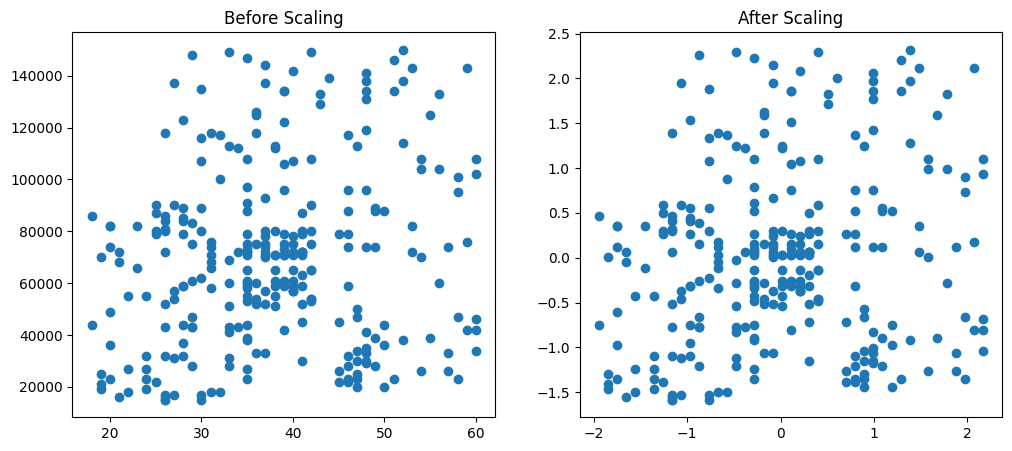

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")

plt.show()

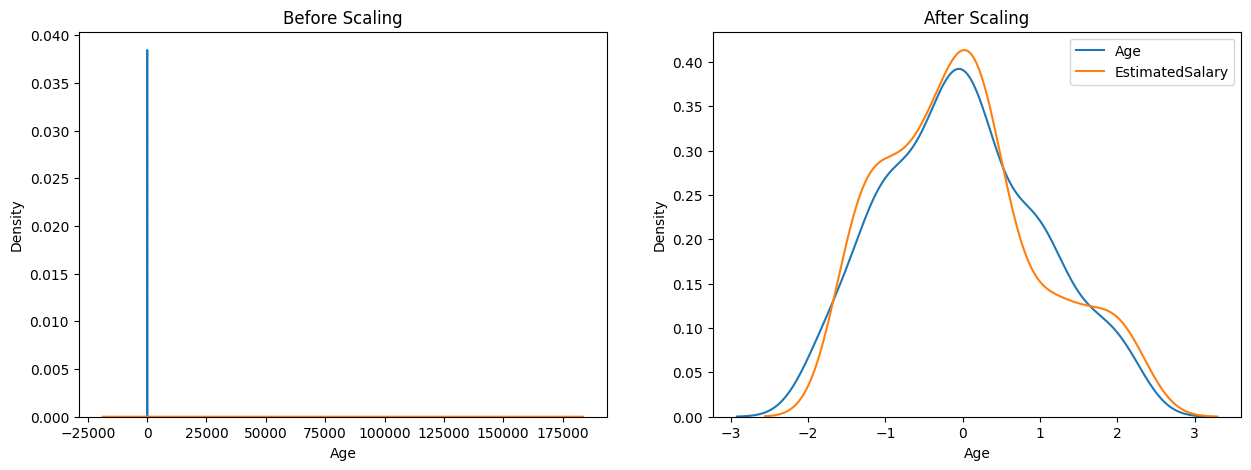

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
plt.legend(['Age','EstimatedSalary'])

# After scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.legend(['Age','EstimatedSalary'])

plt.show()

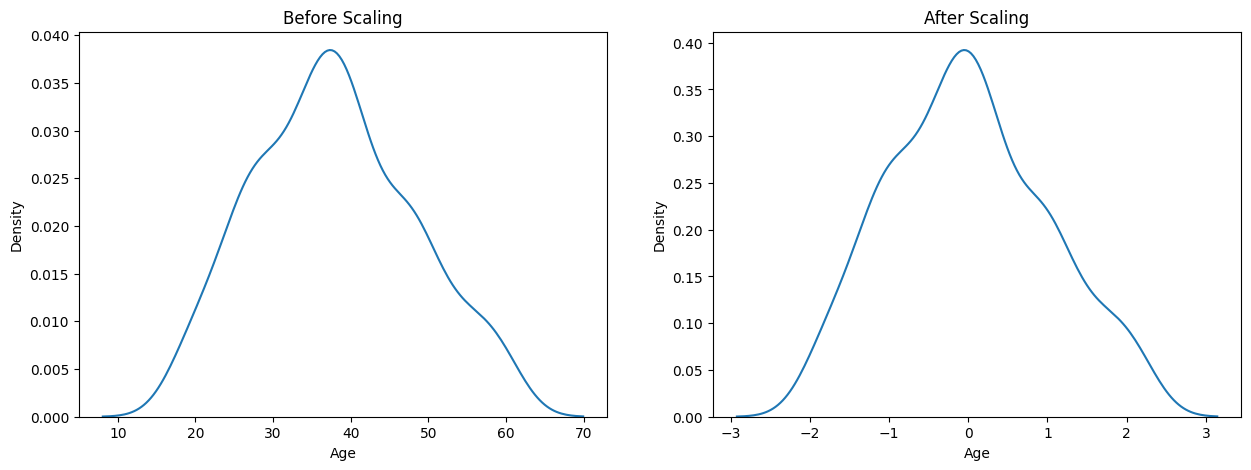

In [45]:
# Age Before scaling
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)

# Age After scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()

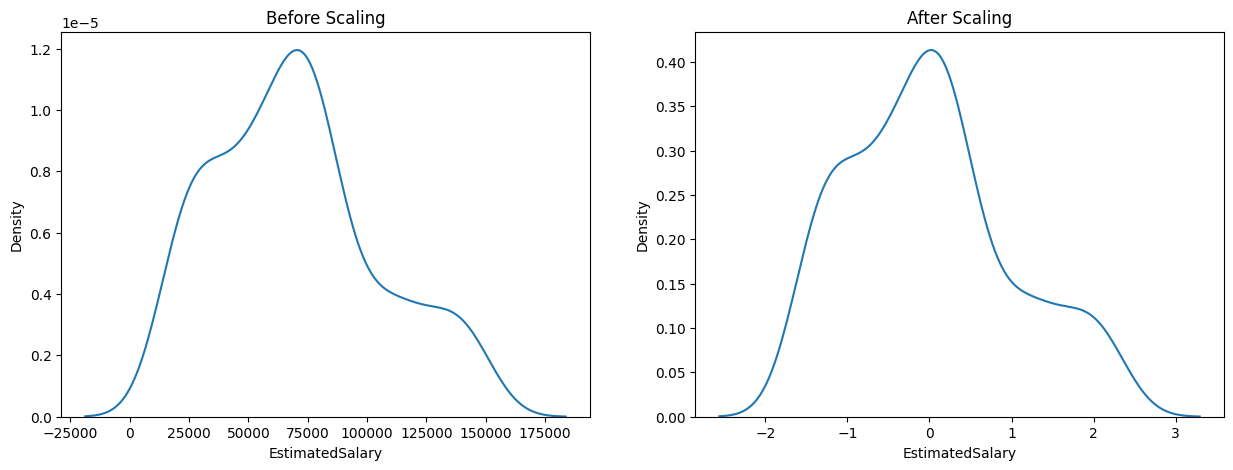

In [46]:
# EstimatedSalary Before scaling
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# EstimatedSalary After scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Why Scaling is important ?

In [47]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Creating the two objects of logistics regression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [63]:
# Here we are training the model on original datasets
lr.fit(x_train,y_train)

# Here we are traiing the model on scaled datasets
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [51]:
# Here we are making prediction on original test datasets
y_pred = lr.predict(x_test)

# Here we are making prediction on Scaled test datasets
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [52]:
from  sklearn.metrics import accuracy_score

In [54]:
print(f"Accuracy without scaling: {accuracy_score(y_test,y_pred)}")
print(f"Accuracy with scaling: {accuracy_score(y_test,y_pred_scaled)}")

Accuracy without scaling: 0.875
Accuracy with scaling: 0.8666666666666667


In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [58]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [60]:
print(f"Accuracy without scaling: {accuracy_score(y_test,y_pred)}")
print(f"Accuracy with scaling: {accuracy_score(y_test,y_pred_scaled)}")

Accuracy without scaling: 0.875
Accuracy with scaling: 0.875
